In [1]:
#import all necessary packages
import numpy as np
import pandas as pd
import matplotlib as plt
import re
import os  
from email_validator import validate_email, EmailNotValidError

# EDA of the National Trust Dataset
### National Trust
The National Trust dataset is a database of all of the non-governmental organizations registered with the Indian National Trust for the Welfare of Persons with Autism, Cerebral Palsy, Mental Retardation and Multiple Disabilities. The National Trust is an Indian national governmental organization, specifically under the Department of Empowerment of Persons with Disabilities. According to the site website, this database was last updated on April 1st, 2022 as of March 6th, 2023.

In [2]:
trust = pd.read_csv('nationaltrust1.csv', dtype={'Phone No.': 'str'})
trust.head()

,S.No.,State,District,Organization Name,Email,Address,Phone No.,Schemes Enrolled,Authorized Person
0,1,Andhra Pradesh,Krishna\t\t\t\t\t\t\t\t\t\t\t,SIRISHA REHABILITATION CENTRE,srcpamidi@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tDNO 3 /57, Veeran...",9441413161,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tVikaas,Disha\t\t\t...",M IMMANUEL
1,2,Andhra Pradesh,Krishna\t\t\t\t\t\t\t\t\t\t\t,Kasinadhuni Durgamba Butchaiah Trust,kdbtrust_elakurru@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t3-74, NEAR S.F.U.P...",9441195424,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tDisha,Vikaas\t\t\t...",Kasinadhuni Nageswara Rao
2,3,Andhra Pradesh,Godavari East\t\t\t\t\t\t\t\t\t\t\t,Uma Educational and Technical Society,umamanovikasakendram@gmail.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t4 -54, Uma Manovik...",9848164779,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tBadhte Kadam,Ghara...",S.P.Reddy
3,4,Andhra Pradesh,Vishakhapatnam\t\t\t\t\t\t\t\t\t\t\t,Sreya Foundation,sreyafoundation@yahoo.co.in,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tD.No.9-11-8/30, Si...",9290457978,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tSamarth,Badhte Kad...",Dr. Usha Devi.P
4,5,Andhra Pradesh,Guntur\t\t\t\t\t\t\t\t\t\t\t,Sri Dakshinya Bhava Samithi,dakshinya1995@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tMadhavi Nilayam, S...",7702977499,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tGharaunda,Samarth,...",Dr. T. Venkateswara Rao


## Cleaning the Data
Before I begin to analyze this dataset, I need to clean the data extensively.

During the webscraping process, both unnecessary rows and values in certain columns were added to my data.
For every page that my scraper navigated to, two rows of nearly entirely NaN values (except the S.No. column) were added as rows to the dataset, which need to be dropped. According to the dataset, there are exactly 542 actual entries in our data. <br>
<br>
Values in the 'District', 'Address', and 'Schemes Enrolled' columns had strings of format-type characters concatenated to the actual data values, which need to be dropped. <br>

### Dropping Non-Entry Rows

In [3]:
trust.value_counts(['State']).sum()

542

Looking at the sum of value counts under the state column, there are 542 rows with some state value listed above (and therefore not NaN); I can therefore exclude all rows that have a NaN value in the current dataframe, as all of the rows with actual data will be preserved.

In [4]:
trust = trust[trust['State'].notna()]
trust.head()

,S.No.,State,District,Organization Name,Email,Address,Phone No.,Schemes Enrolled,Authorized Person
0,1,Andhra Pradesh,Krishna\t\t\t\t\t\t\t\t\t\t\t,SIRISHA REHABILITATION CENTRE,srcpamidi@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tDNO 3 /57, Veeran...",9441413161,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tVikaas,Disha\t\t\t...",M IMMANUEL
1,2,Andhra Pradesh,Krishna\t\t\t\t\t\t\t\t\t\t\t,Kasinadhuni Durgamba Butchaiah Trust,kdbtrust_elakurru@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t3-74, NEAR S.F.U.P...",9441195424,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tDisha,Vikaas\t\t\t...",Kasinadhuni Nageswara Rao
2,3,Andhra Pradesh,Godavari East\t\t\t\t\t\t\t\t\t\t\t,Uma Educational and Technical Society,umamanovikasakendram@gmail.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t4 -54, Uma Manovik...",9848164779,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tBadhte Kadam,Ghara...",S.P.Reddy
3,4,Andhra Pradesh,Vishakhapatnam\t\t\t\t\t\t\t\t\t\t\t,Sreya Foundation,sreyafoundation@yahoo.co.in,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tD.No.9-11-8/30, Si...",9290457978,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tSamarth,Badhte Kad...",Dr. Usha Devi.P
4,5,Andhra Pradesh,Guntur\t\t\t\t\t\t\t\t\t\t\t,Sri Dakshinya Bhava Samithi,dakshinya1995@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tMadhavi Nilayam, S...",7702977499,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tGharaunda,Samarth,...",Dr. T. Venkateswara Rao


All of the extraneous rows have been dropped, and the dataframe now has only the 542 entries from the data source.

### Fixing the Dataframe Indices

In [5]:
trust = trust.reset_index()
trust = trust.drop(columns=['index'])
trust.head()

,S.No.,State,District,Organization Name,Email,Address,Phone No.,Schemes Enrolled,Authorized Person
0,1,Andhra Pradesh,Krishna\t\t\t\t\t\t\t\t\t\t\t,SIRISHA REHABILITATION CENTRE,srcpamidi@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tDNO 3 /57, Veeran...",9441413161,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tVikaas,Disha\t\t\t...",M IMMANUEL
1,2,Andhra Pradesh,Krishna\t\t\t\t\t\t\t\t\t\t\t,Kasinadhuni Durgamba Butchaiah Trust,kdbtrust_elakurru@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t3-74, NEAR S.F.U.P...",9441195424,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tDisha,Vikaas\t\t\t...",Kasinadhuni Nageswara Rao
2,3,Andhra Pradesh,Godavari East\t\t\t\t\t\t\t\t\t\t\t,Uma Educational and Technical Society,umamanovikasakendram@gmail.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t4 -54, Uma Manovik...",9848164779,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tBadhte Kadam,Ghara...",S.P.Reddy
3,4,Andhra Pradesh,Vishakhapatnam\t\t\t\t\t\t\t\t\t\t\t,Sreya Foundation,sreyafoundation@yahoo.co.in,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tD.No.9-11-8/30, Si...",9290457978,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tSamarth,Badhte Kad...",Dr. Usha Devi.P
4,5,Andhra Pradesh,Guntur\t\t\t\t\t\t\t\t\t\t\t,Sri Dakshinya Bhava Samithi,dakshinya1995@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tMadhavi Nilayam, S...",7702977499,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tGharaunda,Samarth,...",Dr. T. Venkateswara Rao


### The District Column

In [6]:
trust['District'][0]

'Krishna\t\t\t\t\t\t\t\t\t\t\t'

In [7]:
trust['District'][1]

'Krishna\t\t\t\t\t\t\t\t\t\t\t'

Evident from the first few rows, all of the values of the district column contain excess characters after the last letter of the actual data; this excess character string always starts with a '\' character, which I can split the string to obtain just the desired value.

In [8]:
trust['District'] = trust['District'].astype(str)
trust['District'] = trust['District'].str.split('\t\t\t\t\t\t\t\t\t\t\t').str[0]
trust.head()

,S.No.,State,District,Organization Name,Email,Address,Phone No.,Schemes Enrolled,Authorized Person
0,1,Andhra Pradesh,Krishna,SIRISHA REHABILITATION CENTRE,srcpamidi@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tDNO 3 /57, Veeran...",9441413161,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tVikaas,Disha\t\t\t...",M IMMANUEL
1,2,Andhra Pradesh,Krishna,Kasinadhuni Durgamba Butchaiah Trust,kdbtrust_elakurru@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t3-74, NEAR S.F.U.P...",9441195424,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tDisha,Vikaas\t\t\t...",Kasinadhuni Nageswara Rao
2,3,Andhra Pradesh,Godavari East,Uma Educational and Technical Society,umamanovikasakendram@gmail.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\t4 -54, Uma Manovik...",9848164779,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tBadhte Kadam,Ghara...",S.P.Reddy
3,4,Andhra Pradesh,Vishakhapatnam,Sreya Foundation,sreyafoundation@yahoo.co.in,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tD.No.9-11-8/30, Si...",9290457978,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tSamarth,Badhte Kad...",Dr. Usha Devi.P
4,5,Andhra Pradesh,Guntur,Sri Dakshinya Bhava Samithi,dakshinya1995@yahoo.com,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tMadhavi Nilayam, S...",7702977499,"\r\n\t\t\t\t\t\t\t\t\t\t\t\tGharaunda,Samarth,...",Dr. T. Venkateswara Rao


### The Organization Name Column

In [9]:
excluded_words = ['and', 'an', 'run', 'the', 'for', 'by']

i = 0
for name in trust['Organization Name']:
    words = name.split()
    first_word = [words[0].capitalize()]
    rest_words = words[1:]
    capitalized_words = [word.title() if word.lower() not in excluded_words else word.lower() for word in rest_words]
    converted_string = " ".join(first_word + capitalized_words)
   
    trust['Organization Name'][i] = converted_string
    i = i + 1

trust['Organization Name']

0                          Sirisha Rehabilitation Centre
1                   Kasinadhuni Durgamba Butchaiah Trust
2                  Uma Educational and Technical Society
3                                       Sreya Foundation
4                            Sri Dakshinya Bhava Samithi
                             ...                        
537                                    Muskan Foundation
538                           Voluntary Medicare Society
539                  Swami Viveka Nand Educational Trust
540    Hope Disability Centre an Undertaking Of She H...
541     Humanity Welfare Organisation Helpline Bijbehara
Name: Organization Name, Length: 542, dtype: object

### The Phone Number Column

In [10]:
#set all email characters to lowercase
lowercase = lambda x: x.lower() 
trust['Email'] = trust['Email'].apply(lowercase)
trust['Email'].head()

0               srcpamidi@yahoo.com
1       kdbtrust_elakurru@yahoo.com
2    umamanovikasakendram@gmail.com
3       sreyafoundation@yahoo.co.in
4           dakshinya1995@yahoo.com
Name: Email, dtype: object

### The Address Column

In [11]:
trust['Address'] = trust['Address'].astype(str)
clean_str = lambda x: re.sub(r'[\r\n\t]+', '', x)

def capitalize_names(s):
    names = s.split()
    cp_names = [name.title() for name in names]
    return " ".join(cp_names)

trust['Address'] = trust['Address'].apply(clean_str)
trust['Address'] = trust['Address'].apply(capitalize_names)
trust['Address'].head()

0    Dno 3 /57, Veerankilock,Pamidimukkala(Md), Vee...
1    3-74, Near S.F.U.P Schoolink Road, Elakurru - ...
2    4 -54, Uma Manovikas Nagarvakala Pudi Panchaya...
3    D.No.9-11-8/30, Sivajipalemopp Road Sivajipark...
4    Madhavi Nilayam, Swarna Bharathi Nagarj.K.C. C...
Name: Address, dtype: object

### The Phone Number Column

In [12]:
def format_phoneno(s):
    return s[:5] + "-" + s[5:]

trust['Phone No.'] = trust['Phone No.'].apply(format_phoneno)
trust['Phone No.'].head()

0     9441-413161 
1     9441-195424 
2     9848-164779 
3     9290-457978 
4     7702-977499 
Name: Phone No., dtype: object

### The Schemes Enrolled Column

In [13]:
trust['Schemes Enrolled'] = trust['Schemes Enrolled'].astype(str)

trust['Schemes Enrolled'] = trust['Schemes Enrolled'].apply(clean_str)
trust['Schemes Enrolled'].head()

0                    Vikaas,Disha Niramaya
1                             Disha,Vikaas
2          Badhte Kadam,Gharaunda Niramaya
3        Samarth,Badhte Kadam,Vikaas,Disha
4    Gharaunda,Samarth,Vikaas,Badhte Kadam
Name: Schemes Enrolled, dtype: object

### The Authorized Person Column

In [14]:
i = 0
for name in trust['Authorized Person']:
    words = name.split()
    capitalized_names = [word.title() for word in words]
    
   
    trust['Authorized Person'][i] = " ".join(capitalized_names)
    i = i + 1

trust['Authorized Person']

0                     M Immanuel
1      Kasinadhuni Nageswara Rao
2                      S.P.Reddy
3                Dr. Usha Devi.P
4        Dr. T. Venkateswara Rao
                 ...            
537               Parveen Kumari
538     Dr. Mir Mohammad Maqbool
539                Chamail Kumar
540          Miss Huzaifa Ashraf
541              Javed Ahmad Tak
Name: Authorized Person, Length: 542, dtype: object

## Preliminary Data Analysis
Now that I have cleaned the National Trust dataset, I will analyze the dataset.

### Size of data, column descriptions

In [15]:
trust.shape

(542, 9)

The dataset has 542 entries, or organizations, with 9 descriptive columns.

In [16]:
cols_trust = trust.columns.values.astype('str')
col_tr_list = cols_trust.tolist()
col_tr_list

['S.No.',
 'State',
 'District',
 'Organization Name',
 'Email',
 'Address',
 'Phone No.',
 'Schemes Enrolled',
 'Authorized Person']

These are the names of each of the 9 columns in the dataset. The column names provide sufficient description for the data with the exception of the 'S.No', 'Authorized Person', and 'Schemes Enrolled. <br>
<br>
**'S.No.'** refers to the number of the entry in the data (1-542) <br>
**'Authorized Person'** refers to the president, director, chief executive officer, or other designated official of the applicant organization, who has the authority to commit the resources of the organization <br>
<br>
**'Schemes Enrolled'** refers to the scheme(s) under which this organization operates. Government schemes can be defined as a plan, design or program formulated by the government for the welfare of the people. Because the mission 'welfare for persons with disabilities' is very general, the Indian government collaborates with many NGOs, each working on different specialized programs. Each of these programs is categorized by a key name, the descriptions of which are given below.

In [17]:
pd.set_option("display.max_colwidth", 100)

schemes = ['Disha', 'Vikas', 'Samarth', 'Gharaunda', 'Niramaya', 
           'Prerna', 'Sahyogi', 'Sambhav', 'Gyan Prabha', 'Bahdte Kadam'] 

scm_desc = ['Early Intervention and School Readiness for Ages 0-10', 
            'Day Care scheme for Ages 10+',
            'Respite Care Residential', 
            'Group Home for Adults', 
            'Health Insurance', 
            'Marketing Assistance', 
            'Care Associates Training', 
            'Assistive Devices',
            'Educational Support',
            'Community Awareness and Innovative project'
           ]

scm = pd.DataFrame(data={'Scheme Name': schemes[:], 'Description': scm_desc})
scm

,Scheme Name,Description
0,Disha,Early Intervention and School Readiness for Ages 0-10
1,Vikas,Day Care scheme for Ages 10+
2,Samarth,Respite Care Residential
3,Gharaunda,Group Home for Adults
4,Niramaya,Health Insurance
5,Prerna,Marketing Assistance
6,Sahyogi,Care Associates Training
7,Sambhav,Assistive Devices
8,Gyan Prabha,Educational Support
9,Bahdte Kadam,Community Awareness and Innovative project


### The State Column

<AxesSubplot:xlabel='State'>

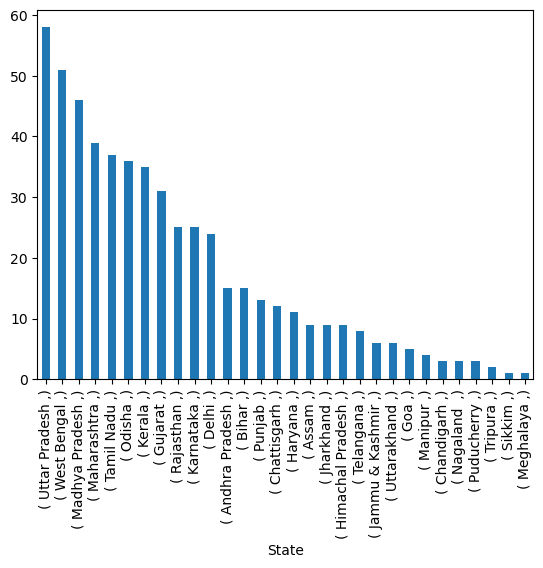

In [18]:
trust.value_counts(['State'])
trust.value_counts(['State']).plot(kind='bar')

The states with the most organizations from our dataset are Uttar Pradesh, West Bengal, and Madhya Pradesh in that order. Tripura, Sikkim, and Meghalaya have the fewest number of NGOs represented in our dataset.

In [19]:
len(pd.unique(trust['State']))

30

Our dataset contains NGOs from 30 unique Indian states and union territories (there are 28 states + 8 union territories = 36 total). States in India are administered by the governor of that state, whereas the an Administrator representative of the president is the head of the executive branch of the union territories.

### The District Column

In [20]:
trust.value_counts(['District'])

District       
Kolkata            13
Bangalore Urban    11
Ahmedabad           9
Bhopal              7
Patna               7
                   ..
Ludhiana            1
Madurai             1
Mahbubnagar         1
Mahesana            1
Yamunanagar         1
Length: 297, dtype: int64

Districts in India are further subdivisions within states; our dataset has 297 unique districts, which is close to half of the 766 districts in India total.

### The Organization Name Column

In [21]:
trust.value_counts(['Organization Name'])

Organization Name                                                                                  
Disha Charitable Trust                                                                                 2
Child Concern                                                                                          2
Aadhar Foundation                                                                                      1
Rural Community Development Of India Rucode India                                                      1
Riddhi Society for Remedial and Integrated Education                                                   1
                                                                                                      ..
Humanity Welfare Organisation Helpline Bijbehara                                                       1
Humanity Charitable Trust                                                                              1
Human Rights Protection Cell and Welfare Association Ashhray

In [22]:
trust[trust['Organization Name'] == 'Disha Charitable Trust']

,S.No.,State,District,Organization Name,Email,Address,Phone No.,Schemes Enrolled,Authorized Person
54,55,Goa,North Goa,Disha Charitable Trust,disha.sare.ansh@gmail.com,"Disha Charitable Trust, 18 June Roadbehind Directorate Of Education, Panaji, Goa - 403001",9822-980015,,Sandhya Kalokhe
80,81,Gujarat,Vadodara,Disha Charitable Trust,dishaschoolbaroda@gmail.com,"62, Sampatrao Colony, Opp. Circuit Housealkapuri, Vadodara - 390005",9227-108880,,Mr. Naresh Chawla


There are 541 unique organization names; 'Disha Charitable Trust' refers to two separate organizations in two different states, therefore I conclude that there are no duplicate entries in our dataset.

### The Email Column

In [23]:
#for loop to validate all emails in the dataset

for email in trust['Email']:
    try:
        email = validate_email(email).email
    except EmailNotValidError as e:
        print(str(e))

Running this cell does not cause an error print message; therefore all email addresses in the dataset have correct syntax and deliverability.

### The Schemes Enrolled Column

In [24]:
trust.value_counts(['Schemes Enrolled'])

Schemes Enrolled                   
                                       271
 Niramaya                               87
Vikaas                                  14
Disha                                   13
Badhte Kadam Niramaya                    9
                                      ... 
Disha,Samarth,Badhte Kadam               1
Disha,Samarth                            1
Disha,Sahyogi,Badhte Kadam               1
Disha,Prerna                             1
Vikaas,Samarth,Badhte Kadam,Sahyogi      1
Length: 104, dtype: int64

The most common schemes enrolled by the NGOs in the dataset include Niramaya, Vikaas, and Disha, with some organizations taking on multiple schemes at a time.

### The Authorized Person Column

In [25]:
trust.value_counts(['Authorized Person'])

Authorized Person         
A Lawrence                    1
Purushottam Gopilal Sharma    1
Raju Yadav                    1
Rajkishor Sabut               1
Rajiv Kumar Raikwar           1
                             ..
Henthianlun                   1
Harpreet Kaur Bedi            1
Harish Malik                  1
Gyanendra Purohit             1
Yusufi F Kapadiya             1
Length: 542, dtype: int64

Most NGO in our dataset have a unique authorized person; some authorized people authorize at most two NGOs in the dataset.

### Transforming Data to Data Schema

In [28]:
#rename columns to match data schema
trust.rename(columns = {'S.No.':'ngoid',
                        'State':'state',
                        'District':'district',
                        'Organization Name':'ngoname',
                        'Email':'orgemail',
                        'Address':'physicaladdress',
                        'Phone No.':'officephone',
                        'Schemes Enrolled':'orgtype',
                        'Authorized Person':'chairmanname'}, inplace = True)
trust.head()

,ngoid,state,district,ngoname,orgemail,physicaladdress,officephone,orgtype,chairmanname
0,1,Andhra Pradesh,Krishna,Sirisha Rehabilitation Centre,srcpamidi@yahoo.com,"Dno 3 /57, Veerankilock,Pamidimukkala(Md), Veerankilock - 521250",9441-413161,"Vikaas,Disha Niramaya",M Immanuel
1,2,Andhra Pradesh,Krishna,Kasinadhuni Durgamba Butchaiah Trust,kdbtrust_elakurru@yahoo.com,"3-74, Near S.F.U.P Schoolink Road, Elakurru - 521156",9441-195424,"Disha,Vikaas",Kasinadhuni Nageswara Rao
2,3,Andhra Pradesh,Godavari East,Uma Educational and Technical Society,umamanovikasakendram@gmail.com,"4 -54, Uma Manovikas Nagarvakala Pudi Panchayath, Near Ryudupalem, Kakinada, District-East Godav...",9848-164779,"Badhte Kadam,Gharaunda Niramaya",S.P.Reddy
3,4,Andhra Pradesh,Vishakhapatnam,Sreya Foundation,sreyafoundation@yahoo.co.in,"D.No.9-11-8/30, Sivajipalemopp Road Sivajipark Main Gate, Visakhapatnam - 530017",9290-457978,"Samarth,Badhte Kadam,Vikaas,Disha",Dr. Usha Devi.P
4,5,Andhra Pradesh,Guntur,Sri Dakshinya Bhava Samithi,dakshinya1995@yahoo.com,"Madhavi Nilayam, Swarna Bharathi Nagarj.K.C. College Road, New Rto Office, Guntur - 522006",7702-977499,"Gharaunda,Samarth,Vikaas,Badhte Kadam",Dr. T. Venkateswara Rao


In [29]:
#check data types of all of the columns
trust.dtypes

ngoid              object
state              object
district           object
ngoname            object
orgemail           object
physicaladdress    object
officephone        object
orgtype            object
chairmanname       object
dtype: object

In [30]:
trust_geography = trust[['state', 'district']]
trust_geography

trust_ngocontact = trust[['ngoname', 'orgemail', 'physicaladdress', 'officephone', 'chairmanname']]
trust_ngocontact

,ngoname,orgemail,physicaladdress,officephone,chairmanname
0,Sirisha Rehabilitation Centre,srcpamidi@yahoo.com,"Dno 3 /57, Veerankilock,Pamidimukkala(Md), Veerankilock - 521250",9441-413161,M Immanuel
1,Kasinadhuni Durgamba Butchaiah Trust,kdbtrust_elakurru@yahoo.com,"3-74, Near S.F.U.P Schoolink Road, Elakurru - 521156",9441-195424,Kasinadhuni Nageswara Rao
2,Uma Educational and Technical Society,umamanovikasakendram@gmail.com,"4 -54, Uma Manovikas Nagarvakala Pudi Panchayath, Near Ryudupalem, Kakinada, District-East Godav...",9848-164779,S.P.Reddy
3,Sreya Foundation,sreyafoundation@yahoo.co.in,"D.No.9-11-8/30, Sivajipalemopp Road Sivajipark Main Gate, Visakhapatnam - 530017",9290-457978,Dr. Usha Devi.P
4,Sri Dakshinya Bhava Samithi,dakshinya1995@yahoo.com,"Madhavi Nilayam, Swarna Bharathi Nagarj.K.C. College Road, New Rto Office, Guntur - 522006",7702-977499,Dr. T. Venkateswara Rao
...,...,...,...,...,...
537,Muskan Foundation,go4muskanfoundation09419@gmail.com,"Vijaypur, Canal Road 9Vijaypur, Canal Road Vijaypur - 184120",9419-150607,Parveen Kumari
538,Voluntary Medicare Society,vmsjk1@gmail.com,"Bemina Bye-Pass, Bemina Bye-Pass Srinagarskims Medical College, Srinagar - 190018",9419-467621,Dr. Mir Mohammad Maqbool
539,Swami Viveka Nand Educational Trust,educationaltrust2007@gmail.com,"Near Shiv Mandir, Katal Batal Nagrota, Jammu - 181221",9419-165110,Chamail Kumar
540,Hope Disability Centre an Undertaking Of She Hope Society for Women Entrepreneurs,huzaifa@hopecentrekashmir.org,"001, Wayil Ganderbalnear Jamie Masjid, Ganderbal - 191201",9797-810011,Miss Huzaifa Ashraf


In [31]:
#Export the cleaned trust dataset as CSV file
os.makedirs('DaanMatch/csvfiles', exist_ok=True)  

#trust to csv
#trust in correct data schema format
trust.to_csv('DaanMatch/csvfiles/nationaltrustfinal.csv', index=False) #final non-pgAdmin cleaned scraped data
trust_geography.to_csv('DaanMatch/csvfiles/nationaltrustgeog.csv', index=False)
trust_ngocontact.to_csv('DaanMatch/csvfiles/nationaltrustngoc.csv', index=False)  